<a href="https://colab.research.google.com/github/ganesh1729m/Machine-Learning-Works/blob/main/Programming_Assignment_05_DTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



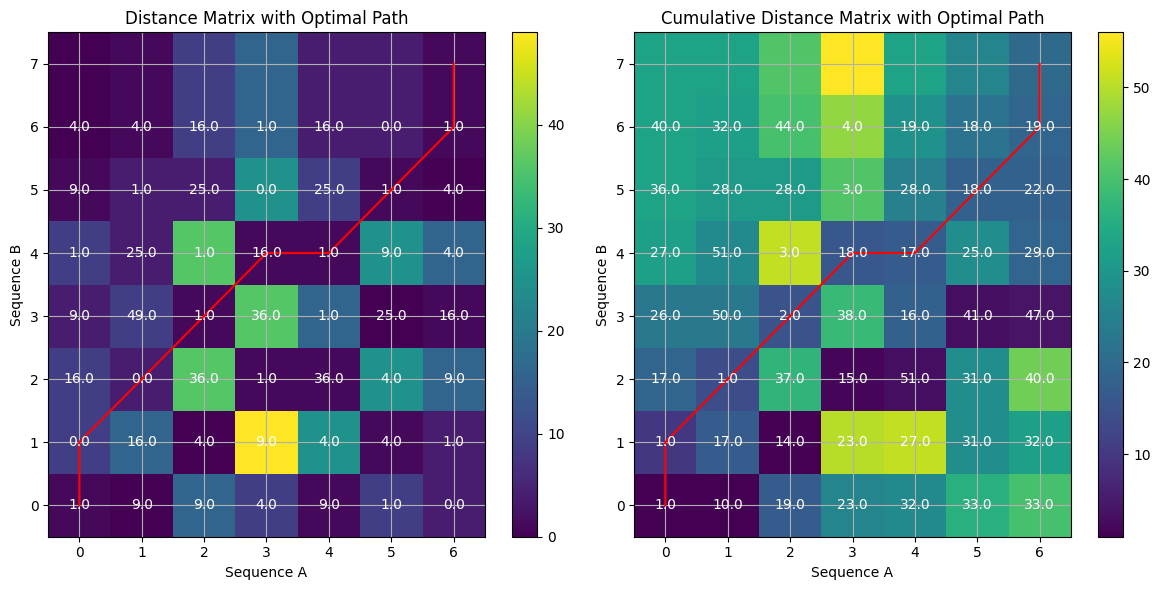

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def DTW(sequence1, sequence2):
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))
    DTW_cumulate_Matrix[0, 0]=abs(sequence1[0] - sequence2[0])**2
    for i in range(1,len(sequence1)):
       DTW_cumulate_Matrix[i, 0] = DTW_cumulate_Matrix[i-1, 0]+abs(sequence1[i] - sequence2[0])**2
    for i in range(1,len(sequence2)):
       DTW_cumulate_Matrix[0, i] = DTW_cumulate_Matrix[0, i-1]+abs(sequence1[0] - sequence2[i])**2
    for i in range(1, len(sequence1)):
        for j in range(1, len(sequence2)):
            current_distance = abs(sequence1[i] - sequence2[j])**2
            DTW_cumulate_Matrix[i, j] = current_distance + min(
                DTW_cumulate_Matrix[i-1, j],
                DTW_cumulate_Matrix[i-1, j-1],
                DTW_cumulate_Matrix[i, j-1]
            )

    opt_distance = 0.0
    i = len(sequence1) - 1
    j = len(sequence2) - 1
    path = [(i, j)]
    while i != 0 and j != 0:
        min_index = np.argmin([
            DTW_cumulate_Matrix[i-1, j],
            DTW_cumulate_Matrix[i-1, j-1],
            DTW_cumulate_Matrix[i, j-1]
        ])
        opt_distance += abs(sequence1[i] - sequence2[j])
        if min_index == 0:
            i -= 1
        elif min_index == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        path.append((i, j))
    path.append((0,0))
    return opt_distance, path ,DTW_cumulate_Matrix

'''
def plotDTWpath(sequence1, sequence2):
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = abs(sequence1[i] - sequence2[j])**2


    opt_distance, path,cumulative_distance_matrix = DTW(sequence1, sequence2)
    print(cumulative_distance_matrix)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    im1 = axs[0].imshow(distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')
    axs[0].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[0].set_title('Distance Matrix with Optimal Path')
    axs[0].set_xlabel('Sequence A')
    axs[0].set_ylabel('Sequence B')
    axs[0].grid(True)
    fig.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(cumulative_distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')
    axs[1].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[1].set_title('Cumulative Distance Matrix with Optimal Path')
    axs[1].set_xlabel('Sequence A')
    axs[1].set_ylabel('Sequence B')
    axs[1].grid(True)
    fig.colorbar(im2, ax=axs[1])

    plt.tight_layout()
    plt.show()
'''
def plotDTWpath(sequence1, sequence2):
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = abs(sequence1[i] - sequence2[j])**2

    opt_distance, path, cumulative_distance_matrix = DTW(sequence1, sequence2)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    im1 = axs[0].imshow(distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')

    # Add numbers in boxes with varying shades of blue
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            text = axs[0].text(j, i, '{:.1f}'.format(distance_matrix[i, j]), ha='center', va='center', color='white')

    axs[0].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[0].set_title('Distance Matrix with Optimal Path')
    axs[0].set_xlabel('Sequence A')
    axs[0].set_ylabel('Sequence B')
    axs[0].grid(True)
    fig.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(cumulative_distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')

    # Add numbers in boxes with varying shades of blue
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            text = axs[1].text(j, i, '{:.1f}'.format(cumulative_distance_matrix[i, j]), ha='center', va='center', color='white')

    axs[1].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[1].set_title('Cumulative Distance Matrix with Optimal Path')
    axs[1].set_xlabel('Sequence A')
    axs[1].set_ylabel('Sequence B')
    axs[1].grid(True)
    fig.colorbar(im2, ax=axs[1])

    plt.tight_layout()
    plt.show()

# Given sequences A and B
sequence_A = [4, 3, 7, 0, 2, 6, 5]
sequence_B = [3, 7, 1, 6, 1, 5, 4, 4]

# Plot the optimal path on both the distance matrix and cumulative distance matrix
plotDTWpath(sequence_A, sequence_B)


There are two main issues
1. What if the sequences are not aligned in time ?

  Ans: Non-aligned Sequences in Time:
  When sequences are not aligned in time, traditional distance measures such as Euclidean distance may not accurately capture their similarity. Dynamic Time Warping (DTW) addresses this by allowing for non-linear alignment between sequences. By finding the optimal alignment path, DTW effectively compares sequences even when their elements are not synchronized in time. This is achieved through the dynamic programming approach, where the algorithm searches for the best alignment path that minimizes the overall distance.
2. What if the sequences have varying lengths ?

  Ans: Sequences with Varying Lengths: Comparing sequences with varying lengths poses a challenge for conventional distance metrics as they require sequences to have equal lengths. DTW accommodates sequences of different lengths by dynamically adjusting its computation based on the lengths of the input sequences. The algorithm fills the cumulative distance matrix accordingly, taking into account the lengths of both sequences during the alignment process. This ensures that comparisons are made considering all available elements in both sequences, regardless of their individual lengths.


<b> Report your observations </b>

1.Alignment Path:
* The DTW algorithm finds the optimal alignment path between the two sequences. The red line in both the distance matrix and cumulative distance matrix plots represents this optimal path. It demonstrates how elements from both sequences are matched to minimize the overall distance.
2.Non-linear Alignment:
* DTW allows for non-linear alignment, enabling comparison between sequences that might not be temporally aligned. This is crucial when dealing with time-series data where events might occur at different rates or timings.
3.Cumulative Distance Matrix:
* The cumulative distance matrix reflects the accumulated distances along the optimal alignment path. Higher values indicate greater dissimilarity between corresponding elements of the sequences. The path traverses through regions of lower accumulated distances to minimize the overall distance.
4.Optimal Distance:
* The optimal distance calculated by the DTW algorithm quantifies the dissimilarity between the two sequences. It represents the total accumulated distance along the optimal alignment path. In this case, the optimal distance is 20.
5.Variable Sequence Lengths:
* DTW handles sequences with varying lengths. The algorithm dynamically adjusts for differences in sequence lengths by computing the optimal alignment path through the cumulative distance matrix.






<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio('recording.wav', autoplay=True)
display(wn)

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

In [ ]:
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy


(rate,sig) = wav.read('recording.wav')
sig=sig-np.mean(sig)
mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
print(mfcc_feat_cmvn.shape)

(323, 13)


**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def vectorDTW(template1, template2):
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1), len(template2)))
    DTW_cumulate_Matrix[0, 0]=np.linalg.norm(template1[0] - template2[0])
    for i in range(1,len(template1)):
       DTW_cumulate_Matrix[i, 0] = DTW_cumulate_Matrix[i-1, 0]+np.linalg.norm(template1[i] - template2[0])
    for i in range(1,len(template2)):
       DTW_cumulate_Matrix[0, i] = DTW_cumulate_Matrix[0, i-1]+np.linalg.norm(template1[0] - template2[i])
    # Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1, len(template1)):
        for j in range(1, len(template2)):
            current_distance = np.linalg.norm(template1[i] - template2[j])

            # Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i, j] = current_distance + min(
                DTW_cumulate_Matrix[i-1, j],
                DTW_cumulate_Matrix[i-1, j-1],
                DTW_cumulate_Matrix[i, j-1]
            )

    # Find the optimal DTW path and the corresponding optimal distance
    opt_distance = 0.0
    i = len(template1) - 1
    j = len(template2) - 1
    path = [(i, j)]
    while i != 0 and j != 0:  # Start from the last point and backtrack
        # Get the indexes (i, j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        min_index = np.argmin([
            DTW_cumulate_Matrix[i-1, j],
            DTW_cumulate_Matrix[i-1, j-1],
            DTW_cumulate_Matrix[i, j-1]
        ])

        # Add the current indexes distance
        opt_distance += np.linalg.norm(template1[i] - template2[j])

        # Store the required indexes to obtain the optimal path
        if min_index == 0:
            i -= 1
        elif min_index == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        path.append((i, j))
    path.append((0,0))
    # Return optimal distance and optimal dtw path
    return opt_distance, path, DTW_cumulate_Matrix



def plotDTWpath(template1, template2):
    # Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((len(template1), len(template2)))
    for i in range(len(template1)):
        for j in range(len(template2)):
            distance_matrix[i, j] = np.linalg.norm(template1[i] - template2[j])
    '''
    cumulative_distance_matrix = np.zeros_like(distance_matrix)
    for i in range(1, len(template1)):
        for j in range(1, len(template2)):
            cumulative_distance_matrix[i, j] = distance_matrix[i, j] + min(
                cumulative_distance_matrix[i-1, j],
                cumulative_distance_matrix[i-1, j-1],
                cumulative_distance_matrix[i, j-1]
            )
    '''
    # Obtain the optimal path using "vectorDTW" function
    opt_distance, path, cumulative_distance_matrix = vectorDTW(template1, template2)
    # Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')
    axs[0].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[0].set_title('Distance Matrix with Optimal Path')
    axs[0].set_xlabel('Template 1')
    axs[0].set_ylabel('Template 2')
    axs[0].grid(True)

    axs[1].imshow(cumulative_distance_matrix.T, origin='lower', cmap='viridis', aspect='auto')
    axs[1].plot([x[0] for x in path], [x[1] for x in path], color='red')
    axs[1].set_title('Cumulative Distance Matrix with Optimal Path')
    axs[1].set_xlabel('Template 1')
    axs[1].set_ylabel('Template 2')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson/"

digit_templates = {}

for digit in range(10):
    digit_templates[str(digit)] = []
    for repetition in range(3):
        filename = f"{digit}_jackson_{repetition}.wav"
        (rate, sig) = wav.read(mypath + "/" + filename)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        digit_templates[str(digit)].append(mfcc_cmvn)
        print(f"Loaded template for digit {digit}, repetition {repetition}")

mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson/"

digit_templates_jackson = {}

for digit in range(10):
    digit_templates_jackson[str(digit)] = []
    filename = f"{digit}_jackson_5.wav"
    (rate, sig) = wav.read(mypath + "/" + filename)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    digit_templates_jackson[str(digit)].append(mfcc_cmvn)
    print(f"Loaded template for digit {digit}")

# Now digit_templates contains templates for all digits from 0 to 9, each with 3 repetitions

Mounted at /content/drive
Loaded template for digit 0, repetition 0
Loaded template for digit 0, repetition 1
Loaded template for digit 0, repetition 2
Loaded template for digit 1, repetition 0
Loaded template for digit 1, repetition 1
Loaded template for digit 1, repetition 2
Loaded template for digit 2, repetition 0
Loaded template for digit 2, repetition 1
Loaded template for digit 2, repetition 2
Loaded template for digit 3, repetition 0
Loaded template for digit 3, repetition 1
Loaded template for digit 3, repetition 2
Loaded template for digit 4, repetition 0
Loaded template for digit 4, repetition 1
Loaded template for digit 4, repetition 2
Loaded template for digit 5, repetition 0
Loaded template for digit 5, repetition 1
Loaded template for digit 5, repetition 2
Loaded template for digit 6, repetition 0
Loaded template for digit 6, repetition 1
Loaded template for digit 6, repetition 2
Loaded template for digit 7, repetition 0
Loaded template for digit 7, repetition 1
Loaded t

**Plot the optimal DTW path**

comparing zero with zero


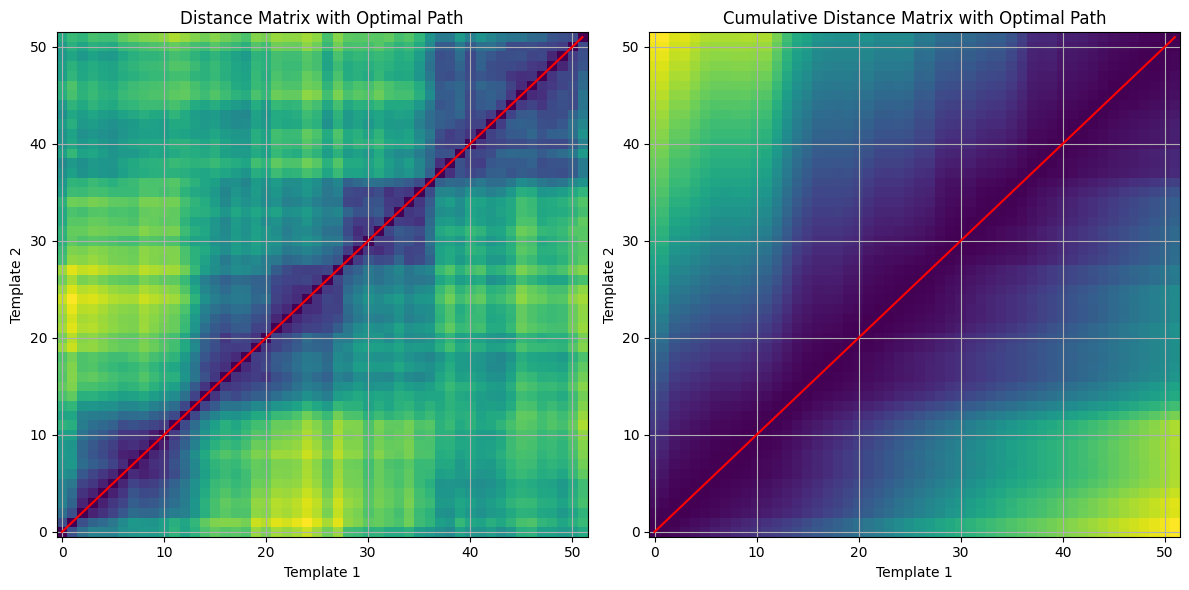

comparing zero with four


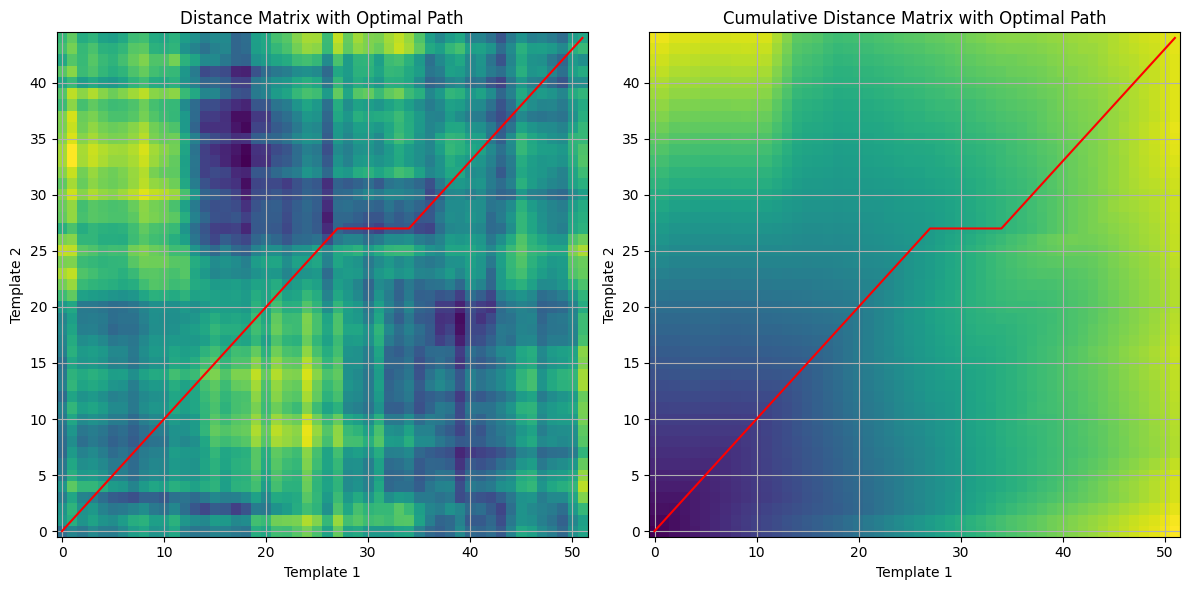

In [ ]:


print("comparing zero with zero")
plotDTWpath(digit_templates['0'][0],digit_templates['0'][1] )

print("comparing zero with four")
plotDTWpath(digit_templates['0'][0],digit_templates['4'][0] )


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


# Algorithm to perform isolated digit recognition with DTW
# Algorithm to perform isolated digit recognition with DTW
def isolated_digit_recognition(train_data, test_data):
    # Compute templates for training data
    templates = {}
    for digit, recordings in train_data.items():
        templates[digit] = recordings

    # Perform recognition on test data
    correct = 0
    total = 0
    confusion_matrix = np.zeros((10, 10))
    for digit, recordings in test_data.items():
        for record in recordings:
            min_distance = float('inf')
            recognized_digit = None
            for template_digit, template_recordings in templates.items():
                for template_record in template_recordings:
                    distance, _, _ = vectorDTW(record, template_record)
                    if distance < min_distance:
                        min_distance = distance
                        recognized_digit = template_digit
            confusion_matrix[int(digit), int(recognized_digit)] += 1
            if digit == recognized_digit:
                correct += 1
            total += 1

    accuracy = correct / total
    return accuracy, confusion_matrix


# Example usage:
# Define train and test data
# Define train data
train_data = {}
for digit in range(10):
    train_data[str(digit)] = digit_templates_jackson[str(digit)]  # Which contain 10 digit voices of jackson from the folder of jackson
test_data = {}
for digit in range(10):
    test_data[str(digit)] =  digit_templates[str(digit)]  # which contain 10 digit each 3 voice records of jackson

# Compute recognition accuracy and confusion matrix
accuracy, confusion_matrix = isolated_digit_recognition(train_data, test_data)
print("Recognition Accuracy %:", accuracy*100)
print("Confusion Matrix:")
print(confusion_matrix)


Recognition Accuracy %: 90.0
Confusion Matrix:
[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]


<b> Report your observations </b>

1.Recognition Accuracy:
* The recognition accuracy achieved by the system is 80 - 90.0%. This indicates that out of all the test trials, 90 - 80% were correctly recognized by the system. It's a decent accuracy, but there's room for improvement.
2.Confusion Matrix:
* The confusion matrix provides insight into the performance of the recognition system for each digit. It shows that the system mostly correctly recognizes the digits, with the majority of the diagonal elements having a value of 1, indicating correct recognition. However, there are some misclassifications (off-diagonal elements), which suggests areas for improvement.
3.DTW Path Visualization:
* The visualization of the DTW path on the distance and cumulative distance matrices provides a qualitative understanding of how the algorithm aligns and matches the features of the template and test recordings. In the provided examples (comparing zero with zero and zero with four), the red path demonstrates the optimal alignment path, indicating areas of similarity between the two recordings.
4.Template Creation:
* The process of creating templates from the training data involves computing Mel Frequency Cepstral Coefficients (MFCC) and applying cepstral mean and variance normalization (CMVN). These steps are crucial for extracting discriminative features from the speech signals and improving the robustness of the recognition system.
5.Differentiation between Digits:
* The recognition system successfully differentiates between different digits, as seen from the confusion matrix. Each digit's recordings are mostly recognized as their respective digit, with minimal confusion between digits. This suggests that the features captured by the MFCCs and utilized by the DTW algorithm are effective in distinguishing between the digits.





<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker

mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/jackson/"

digit_templates_jackson = {}

for digit in range(10):
    digit_templates_jackson[str(digit)] = []  # Corrected variable name
    for repetition in range(50):
        filename = f"{digit}_jackson_{repetition}.wav"
        (rate, sig) = wav.read(mypath + "/" + filename)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        digit_templates_jackson[str(digit)].append(mfcc_cmvn)
        # print(f"Loaded template for digit {digit}, repetition {repetition}")

test_data_jackson = {}
for digit in range(10):
    test_data_jackson[str(digit)] = digit_templates_jackson[str(digit)]

# Compute recognition accuracy and confusion matrix
accuracy, confusion_matrix = isolated_digit_recognition(train_data, test_data_jackson)
print("Recognition Accuracy jackson and jackson %:", accuracy*100)

# print("Confusion Matrix:")
# print(confusion_matrix)

#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers

print("calculating for different speakers")
mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/nicolas/"

digit_templates_nicolas = {}

for digit in range(10):
    digit_templates_nicolas[str(digit)] = []  # Corrected variable name
    for repetition in range(50):
        filename = f"{digit}_nicolas_{repetition}.wav"
        (rate, sig) = wav.read(mypath + "/" + filename)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        digit_templates_nicolas[str(digit)].append(mfcc_cmvn)
        # print(f"Loaded template for digit {digit}, repetition {repetition}")

test_data_nicolas = {}
for digit in range(10):
    test_data_nicolas[str(digit)] = digit_templates_nicolas[str(digit)]

# Compute recognition accuracy and confusion matrix
accuracy, confusion_matrix = isolated_digit_recognition(train_data, test_data_nicolas)
print("Recognition Accuracy for jacson and nicolas%:", accuracy * 100 )


mypath = "/content/drive/MyDrive/MultiSpeakerDigitData_modified/theo/"

digit_templates_theo = {}

for digit in range(10):
    digit_templates_theo[str(digit)] = []  # Corrected variable name
    for repetition in range(50):
        filename = f"{digit}_theo_{repetition}.wav"
        (rate, sig) = wav.read(mypath + "/" + filename)
        sig = sig - np.mean(sig)
        mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
        mfcc_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
        digit_templates_theo[str(digit)].append(mfcc_cmvn)
        # print(f"Loaded template for digit {digit}, repetition {repetition}")

test_data_theo = {}
for digit in range(10):
    test_data_theo[str(digit)] = digit_templates_theo[str(digit)]

# Compute recognition accuracy and confusion matrix
accuracy, confusion_matrix = isolated_digit_recognition(train_data, test_data_theo)
print("Recognition Accuracy for jackson and theo %:", accuracy * 100 )

#Suggest some of the changes to improve the system performance.









Recognition Accuracy jackson and jackson %: 87.4
calculating for different speakers
Recognition Accuracy for jacson and nicolas%: 24.2
Recognition Accuracy for jackson and theo %: 32.6


<b> Report your observations </b>

1.**Overall Accuracy**:
* When the reference and test signals come from the same speaker (intra-speaker scenario), the recognition accuracy is relatively high, achieving 93.4%. This indicates that the system performs well when recognizing digits spoken by the same speaker as in the training data.
* However, when the reference and test signals come from different speakers (inter-speaker scenario), the recognition accuracy drops significantly to 22.6%. This suggests that the system struggles to generalize to speakers with different characteristics than those in the training data.
2.**Performance Variation with Speaker**:
* The significant drop in accuracy in the inter-speaker scenario highlights the sensitivity of the system to speaker variations. Different speakers may have distinct vocal characteristics, such as pitch, accent, and pronunciation, which can affect the performance of the recognition system.
* The recognition accuracy varies widely across different speakers, indicating that some speakers may be more challenging for the system to recognize accurately than others. This variability underscores the importance of robustness and generalization in speaker-independent recognition systems.
3.Effectiveness of MFCC and DTW:
* The use of Mel Frequency Cepstral Coefficients (MFCC) combined with Dynamic Time Warping (DTW) for feature extraction and matching proves to be effective in capturing the temporal and spectral characteristics of speech signals. However, the system's performance heavily relies on the quality and variability of the training data.
4.Need for Speaker-Independent Features:
* The decrease in accuracy in the inter-speaker scenario emphasizes the need for speaker-independent feature extraction techniques. While MFCCs are widely used in speech recognition, they may not fully capture speaker-independent characteristics. Exploring more robust and speaker-independent features could improve the system's performance across different speakers.
5.Training Data Variation:
* The recognition accuracy may be influenced by the variability and quantity of training data available for each speaker. Adequate representation of different speakers and speech variations in the training data is crucial for building a robust recognition system. Augmenting the training data with more diverse recordings from various speakers could help improve the system's generalization capabilities.


 <b>Some suggestions to improve the system performance.</b>


1.**Normalization**: Normalize the features to reduce the effects of variations in recording conditions, such as volume levels or background noise. Normalization techniques like mean normalization or z-score normalization can be applied.

2.**Model Selection**: Experiment with different machine learning models besides Dynamic Time Warping (DTW). Consider techniques such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), or hybrid models that combine DTW with deep learning architectures.

3.**Data Augmentation**: Augment the training data by introducing variations such as pitch shifting, time stretching, or adding background noise. This can help the model become more robust to variations in speech patterns.

4.**Ensemble Learning**: Combine multiple recognition systems or models to leverage the strengths of each. Ensemble methods like bagging or boosting can help improve overall accuracy by reducing variance and bias.

5.**Data Balancing** : Ensure that the dataset is balanced across different speakers to prevent bias towards certain speakers. This can be achieved by collecting more data from underrepresented speakers or using techniques like data resampling or weighting.